<h2>The world is nearly perfectly random at the microscopic scale and hence randomness underlies much of our macroscopic observations.</h2>

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6d/Translational_motion.gif'>

<!---
<img src='https://sites.pitt.edu/~jdnorton/Goodies/exorcism_phase_vol/Maxwell_original_demon_120.png'>
-->

Large numbers of particles each having a very large number of possible physical states leads to practically infinite possibilities for the microscopic configuration with essentially equal probablity for each state.

Yet, statistical mechanics defines laws which are strictly reproducible despite this (in fact because of) this microscopic randomness.

<img src='https://jeffjar.me/files/physics113/dfluc100.gif'>

Reproducibility is useful for debugging and a necessity for [ensuring that](<http://s3.amazonaws.com/nrbook.com/book_C210.html>)

><strong><em>"... a deterministic program that produces a random sequence should be different from, and &ndash; in all measurable respects &ndash; statistically uncorrelated with, the computer program that *uses* its output."</strong></em>

This last statement is the reason for ***pseudo-random generators***.

They are essential for the **Monte Carlo method** of simulation which depends on the concept of using randomness to solve problems that might be deterministic in principle.

---

<h2>Using Random Number Generators in Python</h2>

Python, like most other programming languages, uses the [Mersenne Twister](<http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/emt.html>) algorithm as the core pseudo-random number generator.  Almost all module functions depend on the basic function <code>random()</code> in the standard library (<tt>stdlib</tt> module).  It is imported from the [<code>random</cdoe> class](https://docs.python.org/3/library/random.html).  There are a number of functions in that class, including the ability to set the seed (<code>random.seed(seedvalue)</code>) so that you get a reproducible set of random numbers each time you run your program.  You can also access random number functions through <code>numpy.random</code>.

<h3>Proper Use of Random number generators in Python</h3>

Although <code>numpy.random</code> is fine to use for most applications, best practice for scientific code now is to not use it.


><strong><em>Best practice now is to \*not\* reseed a BitGenerator using the seed function, but rather to recreate a new one. The Python methods allowing you to set a global seed remains for legacy reasons.</strong></em>

<code>numpy.random.seed(number)</code> sets the global random number seed.  This affects all uses to the np.random.* module. That's fine for a small project, but if you import other packages, one or more of those imported packages or other scripts could reset the global random seed to another random seed and your results would no longer be reliably reproducible.  The preferred method now is:

><strong><em>"The preferred best practice for getting reproducible pseudorandom numbers is to instantiate a generator object with a sveed and pass it around. The implicit global RandomState behind the numpy.random.* convenience functions can cause problems, especially when threads or other forms of concurrency are involved. Global state is always problematic. We categorically recommend avoiding using the convenience functions when reproducibility is involved."</strong></em>&ndash; [Robert Kern, NEP19](<https://numpy.org/neps/nep-0019-rng-policy.html#:~:text=The%20preferred%20best%20practice%20for,forms%20of%20concurrency%20are%20involved.>)


In other words, if you want reproducibility, then, for the specific parts of your code that use random number sequences, make your own generator seeded with whatever seed you want and pass that generator to the specific pieces of code that need it.

An example is below.



In [ ]:
# Initialise a random number generator for use by functions in this
# code where we want reproducible results

import numpy as np

# set the seed for my random number generator
rng = np.random.default_rng(8472)

def myRandomGen(nRands, rng):
  '''
  Returns nRands random numbers between 0. and 1. in a numpy 
  array using the defined random number generator rng

  Parameters:
  arg1 (int)        non-negative integer specifying the number of randoms
                    [0.0, 1.0) to return in a numpy array
  arg2 (Generator)  specifies the random number generator

  Returns: numpy array with nRands random numbers with values [0.0, 1.0)
  '''

  return rng.random(nRands)

random_number = myRandomGen(10, rng)
print(random_number)

[0.01303773 0.67322819 0.35636716 0.64539446 0.82714131 0.52131808
 0.98079566 0.80821646 0.61441279 0.46330169]


<h2>The Law of Large Numbers</h2>

Monte Carlo simulations work as they make use of the **Law of Large Numbers**.  The [law of large numbers](<https://www.stat.berkeley.edu/~stark/Java/Html/lln.htm>) has a central role in probability and statistics. It states that if you repeat an experiment independently a large number of times and average the result, what you obtain should be close to the expected value.  In other words, random deviations from the "true" value of an experimental measurement *average* to the true value.

An easy example of this is to do a Monte Carlo simulation of the throwing of a fair die.  Let's assume a standard die with 6 sides like those used to play dice.  The simulation will "throw" the die a fixed number of times and keep track of the numbers showing face up (i.e. 1 to 6).  The rolling average will keep a record of how the average of the numbers (sum of the numbers showing up on the die divided by the number of rolls) tends, or does not tend, toward the average.  The theoretical "true" number is easy to ascertain as we expect that a fair die has equal probability for any given number to show up, hence, over a large enough number of throws, we expect the frequency for the numbers 1 through 6 to be equal, hence the average should be (1+2+3+4+5+6)/6 = 3.5

<h3>PHYS678 Lecture 5, Example 1</h3>

Verify that the theoretical average for die tosses is achieved by a sufficient number of die tosses.

The code is below.

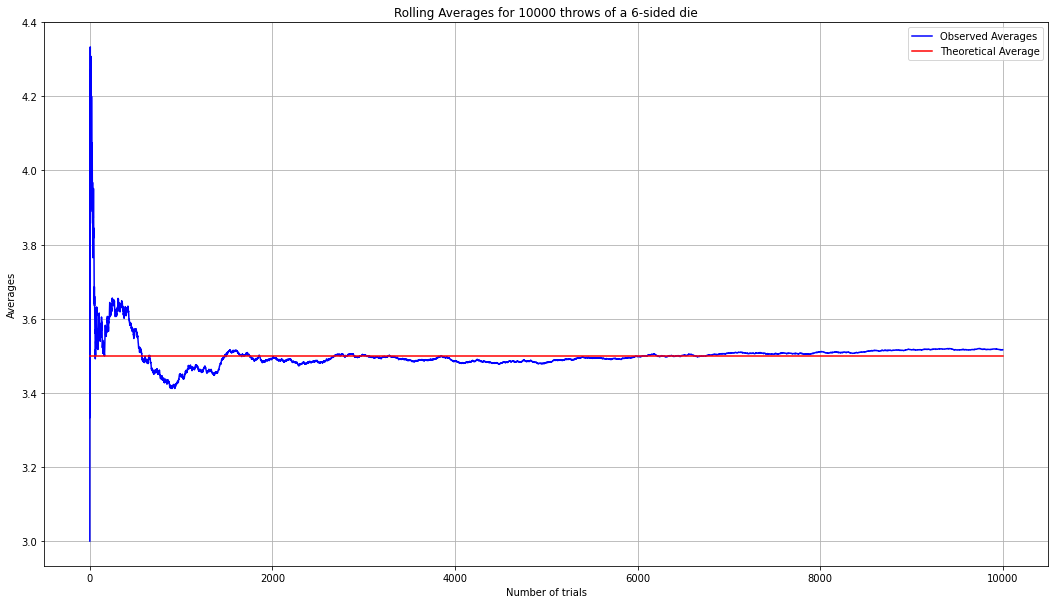

In [ ]:
'''
Determine the average of a large number of die tosses results in the
average trending to that of the theoretical average

Author: L. Gladney
Date:   02/21/2022
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

nTrials = 10000        # sets the number of die tosses
dieSides = 6            # the die can have as many sides as we want

# define our random number generator for this part of the code
rng = np.random.default_rng(452022)
# mimic nTrials throws of the die, each throw yielding 1..6 as a value
throws = rng.integers(low=1, high=dieSides+1, size=nTrials+1)

# determine the running average as we make each throw
runningAverage = []
trialIndex = np.zeros(nTrials-1)

# loop over the throws
for i in range(1, nTrials):
  runningAverage.append(np.average(throws[:i]))
  trialIndex[i-1] = i

# plot the running average
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot()
plt.plot(trialIndex, runningAverage, color='blue')
plt.plot([0, nTrials], [3.5, 3.5], c='red')
plt.grid()
plt.xlabel('Number of trials')
plt.ylabel('Averages')
plt.legend(('Observed Averages','Theoretical Average'), loc='best')
titleStr = 'Rolling Averages for {} throws of a {}-sided die'.format(nTrials, dieSides)
plt.title(titleStr)

plt.show()

Just to check, let's look at the sequence of 1's, 2's, 3's, etc. to see that their frequency is, in fact, the same.

For fun, we'll animate this to see if there are particular parts of the sequence that appear anomalous.

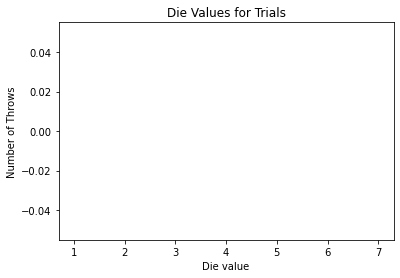

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

number_of_frames = 100
HIST_BINS = np.linspace(1, 7, 7)

def update_hist(num, throws):
  nthrows = int(nTrials*num/number_of_frames)
  plt.cla()
  plt.hist(throws[:nthrows], HIST_BINS)
  plt.xlabel('Die value')
  plt.ylabel('Number of Throws')
  plt.title('Die Values for Trials')

fig = plt.figure()
hist = plt.hist(throws[0], HIST_BINS)

ani = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(throws, ) )

from IPython.display import HTML
HTML(ani.to_html5_video())


<h1>Lab Exercises for Random Processes and Monte Carlo Simulations</h1>

<h2>Radioactivity</h2>

Atoms with unstable nuclei *radioactively* decay with time such that the number of atoms in a sample decreases at a rate which can be well-characterized.  The nature of this decay is that it is entirely stochastic, i.e. the probability of any individual atom decaying is set by looking at the statistics for decay of the sample, not by any characteristic of the atom itself.  While we cannot know when any particular atom will decay, the decay rate of the sample is well-defined.

Typically, we specify the decay rate in terms of a __*half-life*__ or a __*decay constant*__.  The half-life is just the average time in which a sample of $N(t)$ atoms at time $t$ becomes $N(t)/2$ atoms at some time $\tau$, i.e.

\begin{equation}
N(t + \tau) = \frac{N(t)}{2}   \tag{1}
\end{equation}

Since the probability is unaffected by the number of atoms, the formula works for any time interval $\tau$, hence if we were to start with say, 64 atoms, then the table below shows the expected decay rate.

Time|        N(t)
----|----------------
  0 | 64
$\tau$|64(1/2) = 32
$2\tau$|32(1/2)=64(1/2)^2=16
$3\tau$|16(1/2)=64(1/2)^3=8
$4\tau$|8(1/2)=64(1/2)^4=4

We should be mindful that this is not likely to be what we observe for any particular experimental observation starting with 64 atoms.  There will be statistical fluctuations around each number after $t=0$.  But, if we do the experiment many times, the averages for each time interval $\tau$ should converge to those shown in the table.  While we can easily solve the differential equation $dN/dt = -\lambda N(t)$, to get the solution for $N(t)$, it is just as easy to note that the data table above readily describes radioactive decay as

\begin{equation}
N(t) = N_{t=0}\left(\frac{1}{2}\right)^{t/\tau}   \tag{2}
\end{equation}

If we think about how this formula comes about, *before referring to calculus*, we have a better understanding of what the differential equation solution is describing.  This is essential in understanding how to simulate the process with a computer rather than just deriving a numerical solution to the differential equation.  The essential physics is described as

> __Each radioactive nucleus has a defined probability per unit time to decay__

The probability of decay per unit of time is termed the _*decay constant*_, $\lambda$, where

\begin{equation}
\lambda \equiv {\bf the\ probability\ to\ decay\ per\ unit\ time}   \tag{3}
\end{equation}

Note that the units of the decay constant are inverse time.

The mathematics is now clearly defined in terms of observables.  The number of particles observed at time $t$\ is related to the number observed at later time $t + \Delta t$ as

\begin{equation}
N(t) - N(t + \Delta t) = N(t)~\lambda(\Delta t) \Rightarrow \\
\frac{N(t + \Delta t) - N(t)}{\Delta t} = -\lambda\Delta t   \tag{4}
\end{equation}

In the usual fashion of evaluating the limit as $\Delta t$ approaches zero, we have

\begin{equation}
\frac{dN}{dt} = -\lambda N \Rightarrow N(t) = N_0 e^{-\lambda t}   \tag{5}
\end{equation}

with $N_0 = N(t = 0)$.  Now it is also obvious that the connection between the decay constant and the half-life is derivable as follows:

\begin{equation}
N(t) = N_0\left(\frac{1}{2}\right)^{t/\tau} = N_0~2^{-t/\tau}   \tag{6}
\end{equation}

but $N(t)$ also equals $N_0~e^{-\lambda t}$ so if we note that $2 = e^{\ln 2}$ or $e = 2^{1/\ln 2}$, hence

\begin{equation}
N(t) = N_02^{-\lambda t/\ln 2}   \tag{7}
\end{equation}

So the decay constant, relating the probability for decay in unit time, is defined in terms of the observable half-life as

\begin{equation}
\lambda = \frac{\ln 2}{\tau}   \tag{8}
\end{equation}

Given the units of $\lambda$ sometimes the inverse probability per unit time is referred to as the __*lifetime*__, $1/\lambda$, but the half-life is most often used as it is an easy-to-determine observed quantity that relates directly to the probability of decay for any individual atom.

We can now determine a simulation for this process in that we write the probability, $p$, for any *individual* atom to decay in a time interval $\Delta t$, as

\begin{equation}
p = \lambda\Delta t
\end{equation}

where we note that $p$ is independent of time and dependent __only__ on the time interval.  Connecting the simulation to a real observation of radioactive decay requires that we note that the *average* number of atoms decaying in time $\Delta t$ is connected to the probability of each atom decaying times the number of atoms at the beginning of the time interval:

\begin{equation}
\bar{n} = pN   \tag{9}
\end{equation}

Since the number of atoms is an integer, the observation of a decay or not is strictly probabilistic and hence observations of the same time interval at different times must deliver a varying result for the number of atoms decayed and hence the number of atoms remaining.  Every subsequent time interval must therefore lead to a different sequence of decays.  Each observation will fluctuate about the average.  If $n$ is the number of atoms, then it can be shown that the standard deviation is equal to $\sqrt{n}$.

<h2>PHYS678, Lecture 5, Exercise 1</h2>

Simulate the decay of 500 atoms with a given half-life (which you define to be any value you want).  You should simulate an experiment in which you make 100 observations of the number of atoms left with time steps decided so that you get a good observation of the decay lifetime, i.e. most of the atoms are likely to be decayed at the end of 100 observations.  You should repeat the observation 10 times and then look at the resulting 10 observations to see that they are consistent with the half-life value you set.

<h2>PHYS678, Lecture 5, Exercise 1 Solution</h2>

We have defined the probability, $p$, of decay in terms of the half-life, $\tau$ and time step $\Delta t$, as

\begin{equation}
\lambda = \frac{\ln 2}{\tau} \Rightarrow p = \lambda\Delta t = \ln 2\frac{\Delta t}{\tau}   \tag{10}
\end{equation}

For each time step, the simulation loops over the current number of atoms and evaluates whether it decays or not by throwing a random number taken from a uniform distribution between 0 and 1 (since the probability of decay must be less than 1).  If the random number is less than $p$, the atom is considered to have decayed in that time step and the total number of atoms remaining is reduced by 1.

In [ ]:
## Write code here to implement the decay simulation for Exercise 1:

<h2>PHSY678 Lecture 5, Exercise 2</h2>

Consider the figure below showing a box with fixed walls which is divided into two sections of equal size, separated by an impermeable partition. On one side of the partition is a gas of $n$ molecules; on the other side a vacuum. The partition is instantaneously dissolved so that molecules can pass freely from one side to the other. You want to make a plot of the number of molecules on each side as time passes.

<img src='https://jeffjar.me/files/physics113/dfluc100.gif'>

Since the number of molecules is fixed, we only need to keep track of the number of atoms on one side, say the left side, as a function of time.  If <code>n</code> is the total number and <code>nLeft</code> is just the number on the left side, we need only keep track of <code>nLeft</code>. If we then pick a molecule at random and move it to the other side, the probability that we pick a molecule on the left side is <code>nLeft/n</code>, while the probability that we pick a molecule on the right side is <code>(n − nLeft)/n</code>. The probability that we move a molecule from the left to the right hand side is therefore <code>nLeft/n</code>. So, your graph can be obtained without needing to store the position or direction of motion of any particular molecule &ndash; they are all identical so there individual state is irrelevant.  The algorithm is therefore simple to write and quick to run:

<ul>
  <li> Create a random number between 0 and 1.</li>
  <li> If this random number is $\le$ <code>nLeft/n</code>, then move a molecule from left to right (<code>nLeft → nLeft−1</code>), otherwise we move an atom from right to left (<code>nLeft → nLeft+1</code>).</li>
  <li> Increase time by a unit ∆t corresponding to the typical time it takes for an atom to pass across the partition.</li>
</ul>

We expect the last step would be temperature-dependent in an actual experiment, but for this simple model, we can just free associate time and temperature (i.e. average speed of the molecules) so that an integer step in time is equivalent to average time for an individual molecule to cross the partition.

<h3>Part (a.)</h3>
Use the above algorithm to generate the graph of fraction of molecules on the left side of the box as a function of time.

<h3>Part (b.)</h3>

You may notice that the fluctuations of <code>nLeft</code> around the eventual equilibrium value should be represented by the binomial distribution:

\begin{equation}
P_{\tt n_{\rm left}} = \frac{1}{2^{\tt n}}\frac{{\tt n}!}{({\tt n_{\rm left}!)(n - {\tt n}_{\rm left}})!}   \tag{16}
\end{equation}

with $P_{\tt n_{\rm left}}$ being the probability for the distribution to have <code>nLeft</code> molecules on the left side of the box.  The fraction of trials having a particular <code>nLeft</code> should follow this distribution for a large enough set of trials.

For <code>n</code> = 100 and starting at equilibrium, i.e. half the particles on the left, plot how closely your distribution of <code>nLeft</code> comes to the theoretical distribution.

In [ ]:
## Write code here to implement the gas molecules simulation for Exercise 2:

<h2>Diffusion</h2>

The importance of diffusion for understanding biological processes cannot be overstated.  The following is from Phil Nelson's book: ***Biological Physics: Energy, Information, Life***.

> Cells are full of localized structures; “factory” sites must transport their products to distant “customers.”  For example, mitochondria synthesize ATP, which then gets used throughout the cell.  We may speculate that thermal motion, which we have found is a big effect in the nanoworld, somehow
causes molecular transport. It’s time to put this speculation on a firmer footing.

> Suppose we look at one colloidal particle—perhaps a visible pollen grain—every 1/30 second, the rate at which an ordinary video camera takes pictures. An enormous number of collisions happen in this time, and they lead to some net displacement. Each such displacement is independent of the
preceding ones, just like the successive tosses of a coin, because the surrounding fluid is in random motion. It’s true that the steps won’t be all the same length, but we saw in Section 4.1.3 that correcting this oversimplification complicates the math but doesn’t change the physics.

> With enough patience, one can watch a single particle for, say, one minute, note its displacement squared, then repeat the process enough times to get the mean. If we start over, this time using two-minute runs, the diffusion law says that we should get a value of (xN)2	 twice as great as before, and we do. The actual value of the diffusion constant D needed to fit the observations the
diffusion law (Idea 4.6) will depend on the size of the particle and the nature of the surrounding fluid.

> Moreover, what works for a pollen grain holds equally for the individual molecules in a fluid. They too will wander from their positions at any initial instant. We don’t need to see individual molecules to confirm this experimentally. Simply release a large number N of ink molecules at
one point, for example, with a micropipette. Each begins an independent random walk through the surrounding water. We can come back at time t and examine the solution optically using a photometer. The solution’s color gives the number density c(r) of ink molecules, which in turn allows us to calculate the mean-square displacement $<r(t)^2>$ as $N^{−1}\int d^3{\bf r}~{\bf r}^2~c({\bf r})$. By watching the ink spread, we not only can verify that diffusion obeys the law

\begin{equation}
<({\bf r}_N)^2> = 6~Dt   \tag{17}
\end{equation}

> for diffusion in three dimensions,  but also can find the value of the diffusion constant $D$. For small molecules, in water, at room temperature, one finds $D \sim 10^{−9}\ {\rm m}^2\cdot {\rm s}^{−1}$. A more useful form of this number, and one worth memorizing, is $D \sim 1~\mu{\rm m}^2/{\rm ms}$.

Such knowledge is useful to understand the characteristic timescales for processes at the micro-scale.

<h3>Example Problem 3</h3>

Suppose that the interior of a bacterium can be adequately modeled as a sphere of water of radius $1\ {\mu}{\rm m}$, and a cell of your body as a similar sphere of radius $10\ {\mu}{\rm m}$.  Estimate how long it takes for a sudden supply of sugar molecules appearing at the center of the bacterium to spread uniformly throughout the cell?  Do the same estimate for a cell in your body.

<h3>Example Solution 3</h3>

Rearrange Equation 1 and use the value $D = 1\ {\mu}{\rm m}^2/{\rm ms}$ to find that the time for the bacterium is around $(1\ {\mu}{\rm m})^2/(6D) \approx 0.2\ {\rm ms}$.  For the cell in your body, the time would be a hundred times longer.


<h2>Random Walks</h2>

The above is a simulation of particle diffusion in two dimensions.  To go through the exercise in more detail, it is useful to consider a random walk, starting in one dimension, as a bridge to diffusion and other stochastic processes, generally.  For the following exercise, you should write a program to simulate a random walk and then examine the scaling properties.

<h3>PHYS678 Lecture 5, Exercise 3</h3>

For a random walk, a particle moves in random steps, e.g. in Brownian motion due to thermal fluctuations or a particle diffusing over a surface as in the example above.  In 2 dimensions, you describe the random walk by its random individual steps, say $u_i$, where $i$ is the step number and at each step you can choose to take a step along the positive or negative direction in that dimension.  We want each step $u_i$ to be a random variable according to some distribution.  The result of $N$ steps is just the sum displacement after $N$ individual steps.

\begin{equation}
x(N) = \sum_{i=1}^Nu_i   \tag{18}
\end{equation}

Assume here that the steps are simply equally probable along the positive or negative orthogonal direction.

\begin{equation}
u_i = \begin{pmatrix}
-1\ p= 1/2 \\
+1\ p = 1/2
\end{pmatrix}   \tag{19}
\end{equation}

As you might expect, you should find in your simulation that the particle does not stray very far from its initial position.  You can measure the *maximum deviation* in one dimension, $x$, by just $x_{\rm max} - x_{\rm min}$, but the usual description is through the quadratic deviation (i.e. the variance)

\begin{equation}
\Delta x^2 = \langle\left(x_i - \langle x_i\rangle\right)^2\rangle   \tag{20}
\end{equation}

with $\langle...\rangle$ denoting the average.  Since the average is

\begin{equation}
\bar{x} = \langle x\rangle = (1/N)\sum_i x_i   \tag{21}
\end{equation}

then 

\begin{equation}
\Delta x^2 = (1/N)\sum_i\left(x_i - \bar{x}\right)^2   \tag{22}
\end{equation}

**Analyze a number of walks to determine how the variance depends on the number of steps for 1-dimensional random walks.  What do you find?  Is this what you expected?**

In [ ]:
## Write code here to implement the simulation of 1-D random walks: